# Z-оценка

In [1]:
import pandas as pd
import scipy.stats

In [2]:
eng = pd.read_csv('Data/eng_test.csv')
eng.head()

,Id;Exam;Score;Advanced
0,ID1;TOEFL;77;NO
1,ID10;TOEFL;105;NO
2,ID100;TOEFL;107;YES
3,ID101;TOEFL;72;NO
4,ID102;TOEFL;120;YES


In [3]:
eng = pd.read_csv('Data/eng_test.csv', sep=';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


<AxesSubplot:>

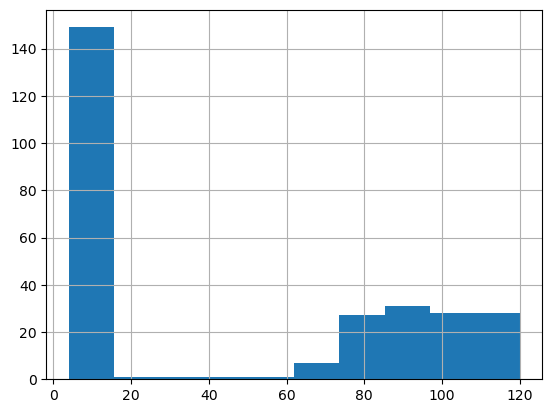

In [4]:
eng['Score'].hist()

In [5]:
toefl = eng[eng['Exam'] == 'TOEFL']
toefl.describe()

,Score
count,125.000000
mean,93.776000
std,17.903804
min,25.000000
25%,81.000000
50%,94.000000
75%,107.000000
max,120.000000


<AxesSubplot:>

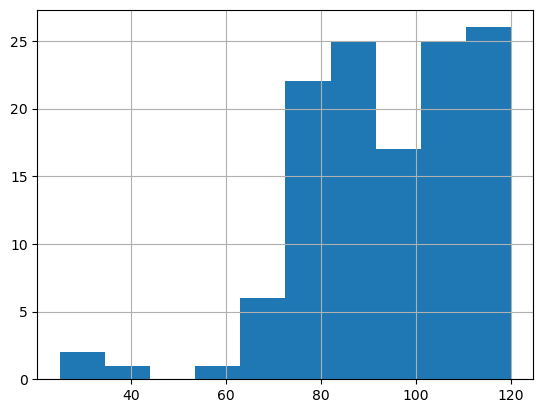

In [6]:
toefl['Score'].hist()

In [7]:
ielts = eng[eng['Exam'] == 'IELTS']
ielts.describe()

,Score
count,149.000000
mean,6.432886
std,1.571126
min,4.000000
25%,5.000000
50%,6.500000
75%,8.000000
max,9.000000


<AxesSubplot:>

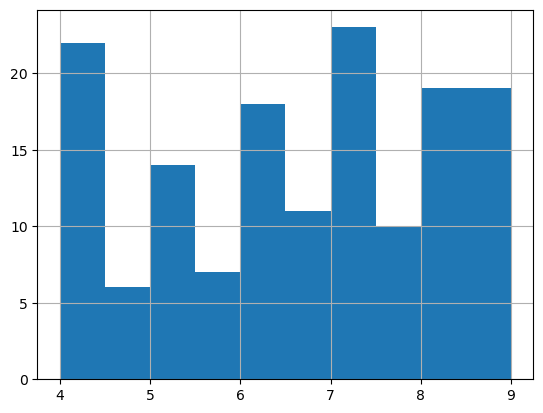

In [8]:
ielts['Score'].hist()

In [9]:
X = toefl['Score'][0] # извлекаем X — считаем z-оценку для первого студента
M = toefl['Score'].mean()
sigma = toefl['Score'].std(ddof=0)
print(X, M, sigma)
z_score = (X - M) / sigma
print(z_score)

77.0 93.776 17.83204486311091
-0.9407782522297513


In [10]:
z_new = 1.4706109
X_new = M + z_new * sigma
print(z_new, X_new, round(X_new))

1.4706109 119.99999954497991 120


In [11]:
scipy.stats.zscore(toefl['Score'])

0     -0.940778
1      0.629429
2      0.741586
3     -1.221172
4      1.470611
         ...   
269   -0.323911
270   -0.211754
271   -0.211754
272   -2.230591
273    0.685507
Name: Score, Length: 125, dtype: float64

In [12]:
toefl['z-score'] = scipy.stats.zscore(toefl['Score'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_9120\3100172893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toefl['z-score'] = scipy.stats.zscore(toefl['Score'])


In [13]:
ielts['z-score'] = scipy.stats.zscore(ielts['Score'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_9120\1836317712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ielts['z-score'] = scipy.stats.zscore(ielts['Score'])


In [14]:
eng = pd.concat([toefl, ielts])

<AxesSubplot:>

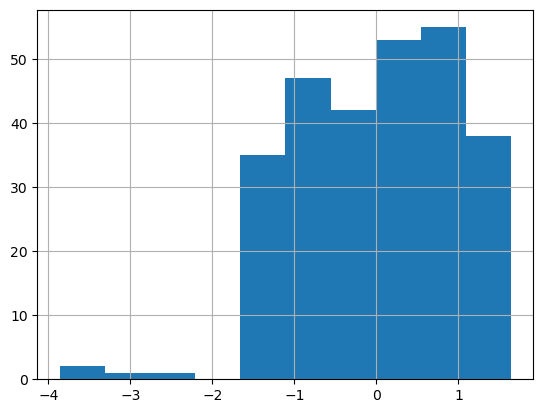

In [15]:
eng['z-score'].hist()

In [16]:
eng[eng['z-score'] < -3]

,Id,Exam,Score,Advanced,z-score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [17]:
eng.groupby('Advanced')['z-score'].mean()

Advanced
NO    -0.397672
YES    0.440499
Name: z-score, dtype: float64